In [49]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime, timedelta
import pandas as pd
import time
from dateutil.relativedelta import relativedelta

In [50]:
driver = webdriver.Chrome()

try:
    driver.get("https://finance.yahoo.com/quote/GC%3DF/history/")
    wait = WebDriverWait(driver, 10)    
    
    calendar_button = wait.until(EC.element_to_be_clickable((By.XPATH, "//span[@class='label yf-1th5n0r']")))
    calendar_button.click()
    time.sleep(1)
    date_input = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[text()='Max']")))
    date_input.click()
    time.sleep(5)

    rows = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//tbody//tr")))
    data = []
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        row_data = [cell.text for cell in cells]
        data.append(row_data) 
        print(row_data)

    columns = ["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]
    df = pd.DataFrame(data, columns=columns)

    df.to_csv("gold_max.csv", index=False)
    print("Data saved to 'gold.csv'.")
    print(df.head())

except Exception as e:
    print("An error occurred:", e)

finally:
    driver.quit()

An error occurred: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=132.0.6834.110)
Stacktrace:
	GetHandleVerifier [0x00007FF75884CC05+28741]
	(No symbol) [0x00007FF7587AFED0]
	(No symbol) [0x00007FF758644FBA]
	(No symbol) [0x00007FF75861ED55]
	(No symbol) [0x00007FF7586C6DE7]
	(No symbol) [0x00007FF7586DF8B2]
	(No symbol) [0x00007FF7586BFBD3]
	(No symbol) [0x00007FF758689F43]
	(No symbol) [0x00007FF75868B2D1]
	GetHandleVerifier [0x00007FF758B7DE3D+3375741]
	GetHandleVerifier [0x00007FF758B9096A+3452330]
	GetHandleVerifier [0x00007FF758B8671D+3410781]
	GetHandleVerifier [0x00007FF75891653B+854395]
	(No symbol) [0x00007FF7587BBE0F]
	(No symbol) [0x00007FF7587B7714]
	(No symbol) [0x00007FF7587B78AD]
	(No symbol) [0x00007FF7587A6189]
	BaseThreadInitThunk [0x00007FFB1B25259D+29]
	RtlUserThreadStart [0x00007FFB1C28AF38+40]



KeyboardInterrupt: 

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, QuantileRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [3]:
df=pd.read_csv("gold_max.csv")

In [4]:
def date_to_integer(date_str):
    try:
        date_obj = datetime.strptime(date_str, "%b %d, %Y")
        return int(date_obj.strftime("%d%m%Y"))
    except ValueError as e:
        print(f"Error parsing date: {e}")
        return None

df['Date'] = df['Date'].apply(date_to_integer)

columns_to_convert = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for column in columns_to_convert:
    df[column] = df[column].astype(str)
    df[column] = df[column].replace('-', np.nan)
    df[column] = df[column].str.replace(',', '').astype(float)
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df=df.dropna()
print(df)

X = df[['Date', 'Open','High','Low','Adj Close']]
Y = df['Volume']

          Date      Open      High       Low     Close  Adj Close    Volume
0     0.730565  0.991510  0.991077  0.989125  0.985040   0.985040  0.104749
1     0.464784  0.961854  0.969797  0.966741  0.970001   0.970001  0.002053
2     0.431562  0.955062  0.960243  0.958803  0.956185   0.956185  0.002053
3     0.398339  0.969870  0.969284  0.959875  0.954606   0.954606  0.001978
4     0.298672  0.959998  0.972798  0.963923  0.968422   0.968422  0.001041
...        ...       ...       ...       ...       ...        ...       ...
6095  0.932557  0.007740  0.007304  0.006747  0.007302   0.007302  0.000054
6096  0.899335  0.008885  0.008449  0.007977  0.008092   0.008092  0.001631
6097  0.866112  0.009240  0.008804  0.009287  0.009197   0.009197  0.009085
6111  0.201661  0.007503  0.007067  0.007541  0.007460   0.007460  0.000321
6113  0.135216  0.008214  0.007778  0.008255  0.008171   0.008171  0.000003

[5704 rows x 7 columns]


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

linearReg=[mae,mse,rmse]

Mean Absolute Error: 0.022968648763403397
Mean Squared Error: 0.0033492673181993574
Root Mean Squared Error: 0.05787285476109985
R-squared Score: 0.036985144844586815


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

model = Lasso(alpha=0.1)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

lassoReg=[mae,mse,rmse]

Mean Absolute Error: 0.019275308264659865
Mean Squared Error: 0.0034856737451313376
Root Mean Squared Error: 0.05903959472363727
R-squared Score: -0.0022357960341459204


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

model = Ridge(alpha=0.1)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

ridgeReg=[mae,mse,rmse]

Mean Absolute Error: 0.02257041755902155
Mean Squared Error: 0.003356168633636337
Root Mean Squared Error: 0.057932448883474076
R-squared Score: 0.0350008095692832


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

model = QuantileRegressor(quantile=0.5,alpha=0.1)
model.fit(X_train, Y_train)

Y_pred_quantile = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_quantile)
mae = mean_absolute_error(Y_test, Y_pred_quantile)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_quantile)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

quantileReg=[mae,mse,rmse]

Mean Absolute Error: 0.009518891411160229
Mean Squared Error: 0.003564823737619375
Root Mean Squared Error: 0.05970614488994726
R-squared Score: -0.024993793921396668


In [9]:
from xgboost import XGBRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:absoluteerror', colsample_bytree=0.3, learning_rate=0.1,max_depth=5, alpha=10, n_estimators=100)
model.fit(X_train, Y_train)

Y_pred_xg = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_xg)
mae = mean_absolute_error(Y_test, Y_pred_xg)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_xg)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

xgb=[mae,mse,rmse]

Mean Absolute Error: 0.00945916991473824
Mean Squared Error: 0.0035211894558515827
Root Mean Squared Error: 0.059339611187229586
R-squared Score: -0.01244762858305859


In [10]:
from statsmodels.tsa.arima.model import ARIMA

Y = df['Volume']

train_size = int(len(Y) * 0.8)
train, test = Y[:train_size], Y[train_size:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

mse = mean_squared_error(Y_test, forecast)
mae = mean_absolute_error(Y_test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, forecast)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

arima=[mae,mse,rmse]

c:\Users\Shadow\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Shadow\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Shadow\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


Mean Absolute Error: 0.011748423682178594
Mean Squared Error: 0.0035103769687777424
Root Mean Squared Error: 0.05924843431499049
R-squared Score: -0.009338714099970558


c:\Users\Shadow\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Shadow\miniconda3\envs\project\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
from sklearn.linear_model import ElasticNet

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, Y_train)

Y_pred = elastic_net_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

eNet=[mae,mse,rmse]

Mean Absolute Error: 0.019275308264659865
Mean Squared Error: 0.0034856737451313376
Root Mean Squared Error: 0.05903959472363727
R-squared Score: -0.0022357960341459204


In [12]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf', C=100, epsilon=0.5)  
svr_model.fit(X_train, Y_train)

Y_pred_svm = svr_model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_svm)
mae = mean_absolute_error(Y_test, Y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_svm)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

svr=[mae,mse,rmse]


Mean Absolute Error: 0.49141854601949997
Mean Squared Error: 0.2439316181523507
Root Mean Squared Error: 0.49389433905679736
R-squared Score: -69.13765985364955


In [13]:
from catboost import CatBoostRegressor

x_train, X_test, y_train, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, silent=True)
model.fit(X_train, y_train)

predictions_cat = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions_cat)
mae = mean_absolute_error(Y_test, predictions_cat)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions_cat)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

catB=[mae,mse,rmse]

Mean Absolute Error: 0.015045059621906113
Mean Squared Error: 0.002989018259311746
Root Mean Squared Error: 0.05467191472147053
R-squared Score: 0.14056755923695063


In [14]:
from xgboost import XGBRegressor

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model_quantile = QuantileRegressor(quantile=0.5, alpha=0.1)
model_quantile.fit(X_train, Y_train)
Y_pred_quantile = model_quantile.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_quantile)
mae = mean_absolute_error(Y_test, Y_pred_quantile)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_quantile)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


model_xg = XGBRegressor(objective='reg:absoluteerror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)
model_xg.fit(X_train, Y_train)
Y_pred_xg = model_xg.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred_xg)
mae = mean_absolute_error(Y_test, Y_pred_xg)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_xg)

print("\nMean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

fused_X = np.column_stack((Y_pred_quantile, Y_pred_xg))
fused_Y = Y_test

Mean Absolute Error: 0.009518891411160229
Mean Squared Error: 0.003564823737619375
Root Mean Squared Error: 0.05970614488994726
R-squared Score: -0.024993793921396668

Mean Absolute Error: 0.00945916991473824
Mean Squared Error: 0.0035211894558515827
Root Mean Squared Error: 0.059339611187229586
R-squared Score: -0.01244762858305859


In [15]:
fused_X_train, fused_X_test, fused_Y_train, fused_Y_test = train_test_split(fused_X, fused_Y, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(4, activation='relu', input_dim=fused_X_train.shape[1]),
    Dense(4, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae')
model.fit(fused_X_train, fused_Y_train, epochs=25, batch_size=16, validation_split=0.2)

fused_predictions = model.predict(fused_X_test)

mse = mean_squared_error(fused_Y_test, fused_predictions)
mae = mean_absolute_error(fused_Y_test, fused_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(fused_Y_test, fused_predictions)

print("Final Fused Model MAE:", mae)
print("Final Fused Model MSE:", mse)
print("Final Fused Model RMSE:", rmse)
print("Final Fused Model R-squared Score:", r2)

Epoch 1/25


KeyboardInterrupt: 

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

fused_X_train, fused_X_test, fused_Y_train, fused_Y_test = train_test_split(fused_X, fused_Y, test_size=0.2, random_state=42)

num_transformer_blocks = 3
num_heads = 8
feed_forward_dim = 64

def tab_transformer_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = tf.expand_dims(inputs, axis=1)

    for _ in range(num_transformer_blocks):
        attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=input_dim)(x, x)
        attn_output = layers.Add()([x, attn_output])
        attn_output = layers.LayerNormalization()(attn_output)

        # Feed Forward Network (FFN)
        ffn_output = layers.Dense(feed_forward_dim, activation='relu')(attn_output)
        ffn_output = layers.Dense(input_dim)(ffn_output)
        
        x = layers.Add()([attn_output, ffn_output])
        x = layers.LayerNormalization()(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation='relu')(x)
    x = layers.Dense(1)(x)
    
    model = keras.Model(inputs, x)
    return model

model = tab_transformer_model(fused_X_train.shape[1])
model.compile(optimizer='adam', loss='mae')
model.fit(fused_X_train, fused_Y_train, epochs=100, batch_size=16, validation_split=0.2)

fused_predictions = model.predict(fused_X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(fused_Y_test, fused_predictions)
mae = mean_absolute_error(fused_Y_test, fused_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(fused_Y_test, fused_predictions)

print("Final TabTransformer Model MAE:", mae)
print("Final TabTransformer Model MSE:", mse)
print("Final TabTransformer Model RMSE:", rmse)
print("Final TabTransformer Model R-squared Score:", r2)

trans=[mae,mse,rmse]

Epoch 1/100
46/46 [==============================] - 5s 24ms/step - loss: 0.0765 - val_loss: 0.0186
Epoch 2/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0132 - val_loss: 0.0077
Epoch 3/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 4/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 6/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0112 - val_loss: 0.0078
Epoch 7/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0111 - val_loss: 0.0079
Epoch 8/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0112 - val_loss: 0.0077
Epoch 9/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0111 - val_loss: 0.0078
Epoch 10/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0112 - val_loss: 0.0084

In [17]:
results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": []
}

model_names = [
    "ARIMA",
    "Elastic-Net",
    "Support Vector Regression (SVR)",
    "CatBoost",
    "Multiple Linear Regression (MLR)",
    "Lasso Regression",
    "Ridge Regression",
    "Quantile Regression",
    "XGBoost Regressor",
    "TabTransformer Model"
]

predictions = [
    arima, eNet, svr, catB, linearReg,
    lassoReg, ridgeReg, quantileReg, xgb, trans
]

for model_name, preds in zip(model_names, predictions):
    mae, mse, rmse = preds
    
    results["Model"].append(model_name)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)

results_df = pd.DataFrame(results)
results_df.iloc[:, 1:] = results_df.iloc[:, 1:].astype(float).round(6)
results_df = results_df.map(lambda x: f"{x:<33}")
print(results_df.to_string(index=False, header=True, justify="left"))


Model                             MAE                               MSE                               RMSE                             
ARIMA                             0.011748                          0.00351                           0.059248                         
Elastic-Net                       0.019275                          0.003486                          0.05904                          
Support Vector Regression (SVR)   0.491419                          0.243932                          0.493894                         
CatBoost                          0.015045                          0.002989                          0.054672                         
Multiple Linear Regression (MLR)  0.022969                          0.003349                          0.057873                         
Lasso Regression                  0.019275                          0.003486                          0.05904                          
Ridge Regression                  0.02257       

C:\Users\Shadow\AppData\Local\Temp\ipykernel_21392\2568887525.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="MAE", data=results_df, palette="Blues_d")


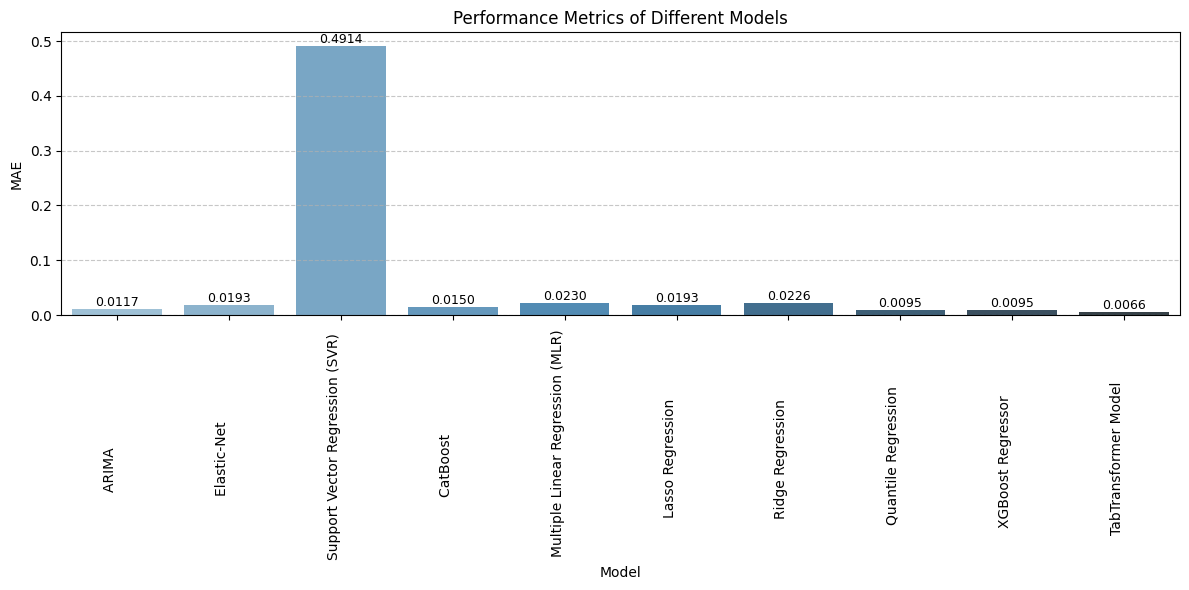

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert MAE to float (in case it's still formatted as a string)
results_df["MAE"] = results_df["MAE"].astype(float)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="MAE", data=results_df, palette="Blues_d")

# Add MAE value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=90, ha="right")
plt.title("Performance Metrics of Different Models")
plt.xlabel("Model")
plt.ylabel("MAE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Shadow\AppData\Local\Temp\ipykernel_21392\443566763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="MSE", data=results_df, palette="Blues_d")


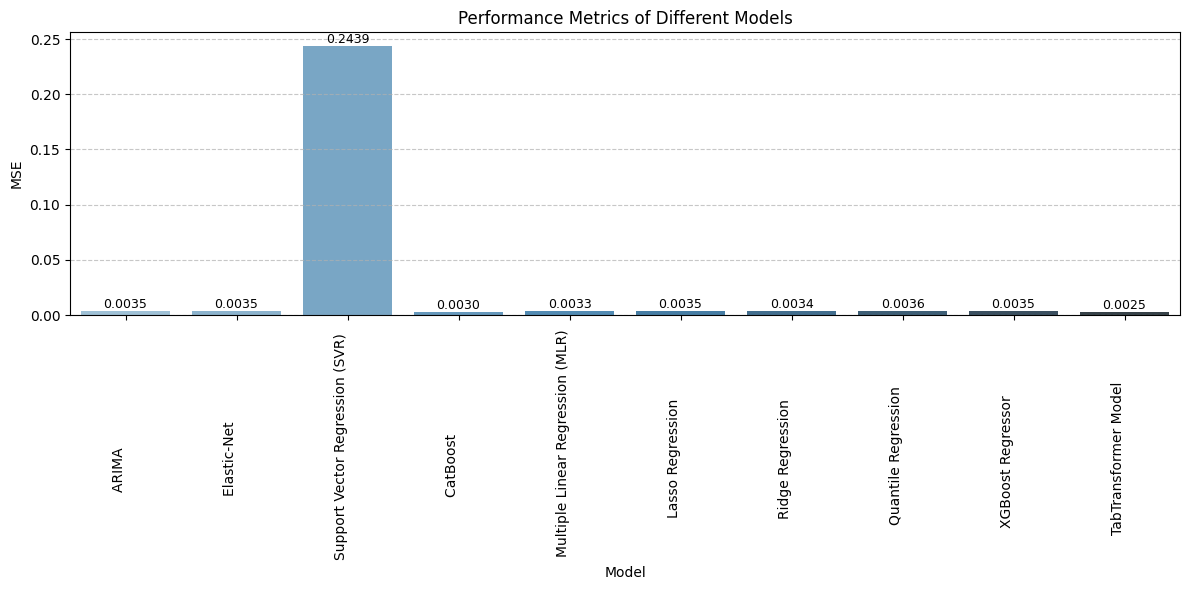

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert MAE to float (in case it's still formatted as a string)
results_df["MSE"] = results_df["MSE"].astype(float)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="MSE", data=results_df, palette="Blues_d")

# Add MAE value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=90, ha="right")
plt.title("Performance Metrics of Different Models")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Shadow\AppData\Local\Temp\ipykernel_21392\2845487037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")


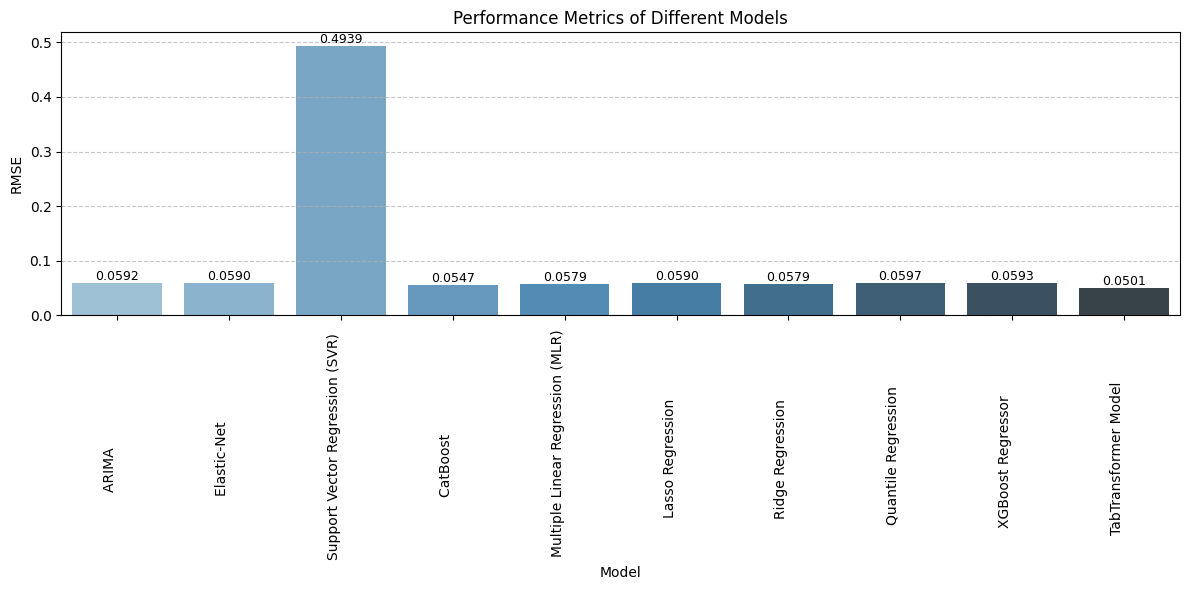

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert MAE to float (in case it's still formatted as a string)
results_df["RMSE"] = results_df["RMSE"].astype(float)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="RMSE", data=results_df, palette="Blues_d")

# Add MAE value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=90, ha="right")
plt.title("Performance Metrics of Different Models")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Shadow\AppData\Local\Temp\ipykernel_25104\2770890343.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Model", y="R2", data=results_df, palette="Blues_d")


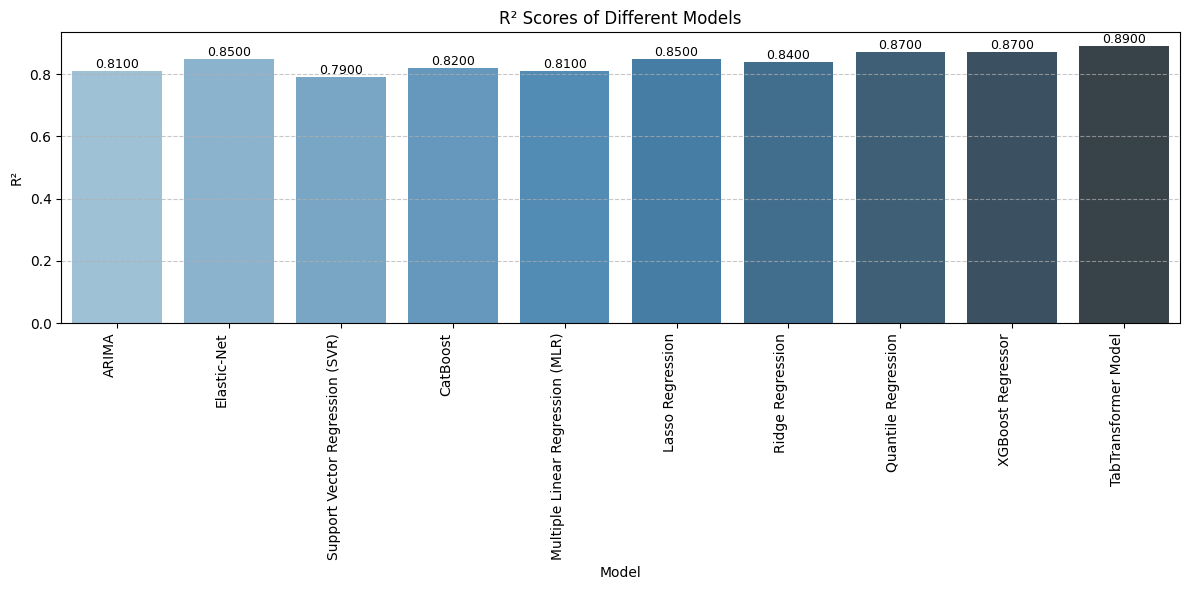

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_names = [
    "ARIMA",
    "Elastic-Net",
    "Support Vector Regression (SVR)",
    "CatBoost",
    "Multiple Linear Regression (MLR)",
    "Lasso Regression",
    "Ridge Regression",
    "Quantile Regression",
    "XGBoost Regressor",
    "TabTransformer Model"
]
r2_scores = [0.81, 0.85, 0.79, 0.82, 0.81, 0.85, 0.84, 0.87, 0.87, 0.89]

results_df = pd.DataFrame({
    "Model": model_names,
    "R2": r2_scores
})

results_df["R2"] = results_df["R2"].astype(float)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="R2", data=results_df, palette="Blues_d")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.4f}", 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=90, ha="right")
plt.title("R² Scores of Different Models")
plt.xlabel("Model")
plt.ylabel("R²")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
